# What is the most optimal skill to learn for a Data Analyst?

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from datasets import load_dataset
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() #It stores data as data sets, we converted it to dataframe

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)



In [2]:
df_DA_IN = df.loc[(df['job_country'] == 'India') & (df['job_title_short']=='Data Analyst')].copy()


In [3]:
df_DA_IN=df_DA_IN.loc[df_DA_IN['salary_year_avg'].notnull()]

In [4]:
df_DA_IN_explode=df_DA_IN.explode('job_skills')
df_DA_IN_skills=df_DA_IN_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

In [5]:
df_DA_IN_skills=df_DA_IN_skills.rename(columns={'count':'skill_count','median':'median_salary'})

In [6]:
DA_job_count=len(df_DA_IN)

In [7]:
df_DA_IN_skills['skills_perc']= (df_DA_IN_skills['skill_count']/DA_job_count)*100

In [8]:
df_DA_IN_skills_high_demand=df_DA_IN_skills[df_DA_IN_skills['skills_perc']>5]

In [9]:
df_DA_IN_skills_high_demand

,skill_count,median_salary,skills_perc
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


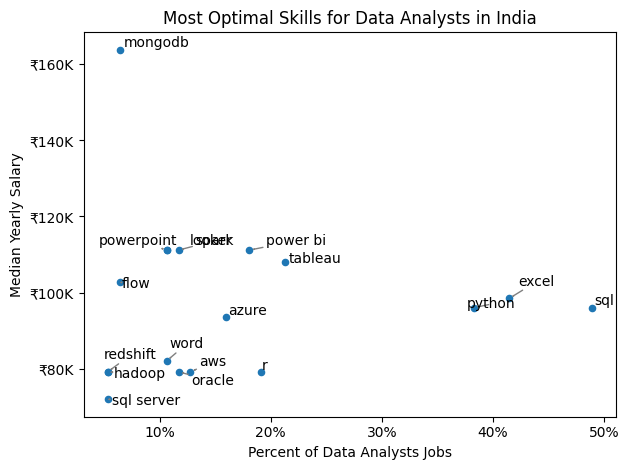

In [17]:
from matplotlib.ticker import PercentFormatter

from adjustText import adjust_text 
df_DA_IN_skills_high_demand.plot(kind='scatter', x='skills_perc', y='median_salary') 
#Prepare texts for adjustText 
texts = [] 
for i, txt in enumerate (df_DA_IN_skills_high_demand.index): 
    texts.append(plt.text(df_DA_IN_skills_high_demand['skills_perc'].iloc[i], df_DA_IN_skills_high_demand ['median_salary'].iloc[i], txt)) 
#Adjust text to avoid overlap 
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray')) 
#Set axis labels, title, and legend 
plt.xlabel('Percent of Data Analysts Jobs') 
plt.ylabel('Median Yearly Salary') 

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'₹{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.title(f'Most Optimal Skills for Data Analysts in India') 
#Adjust layout and display plot 
plt.tight_layout() 
plt.show()